In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import copy

In [71]:
dataset = pd.read_csv("mushrooms.csv")

In [72]:
#Checking whether the dataset contains the null values
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [74]:
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [75]:
# TO PRINT COUNT OF UNIQUE VALUES IN CLASS COLUMN
dataset["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [76]:
# TO PRINT THE ARRAY OF UNIQUE VALUES FOR THAT COLUMN
dataset["class"].unique()

array(['p', 'e'], dtype=object)

/var/folders/95/f499sxxx36v6zfnjtn5rn0p40000gn/T/ipykernel_8183/3926234484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index,y=count.values,alpha=.8,palette="dark")


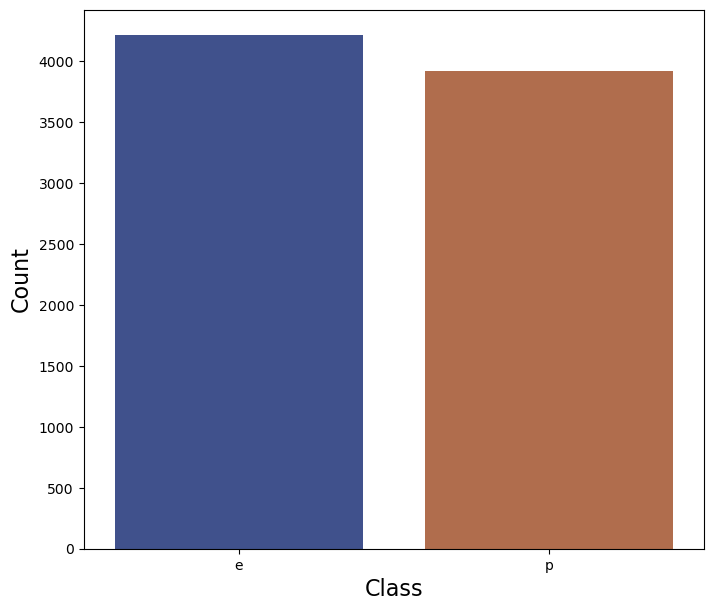

In [77]:
count = dataset["class"].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index,y=count.values,alpha=.8,palette="dark")
plt.xlabel("Class",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

In [78]:
# dataset = dataset.astype("category")
# dataset.dtypes


In [79]:
lbl_encoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = lbl_encoder.fit_transform(dataset[column])



In [80]:
dataset = dataset.drop(["veil-type"],axis=1)

In [81]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [82]:
df_div =  pd.melt(dataset,id_vars=["class"],var_name="Characteristics",value_name="Value")

In [83]:
df_div

,class,Characteristics,Value
0,1,cap-shape,5
1,0,cap-shape,5
2,0,cap-shape,0
3,1,cap-shape,5
4,0,cap-shape,5
...,...,...,...
170599,0,habitat,2
170600,0,habitat,2
170601,0,habitat,2
170602,1,habitat,2


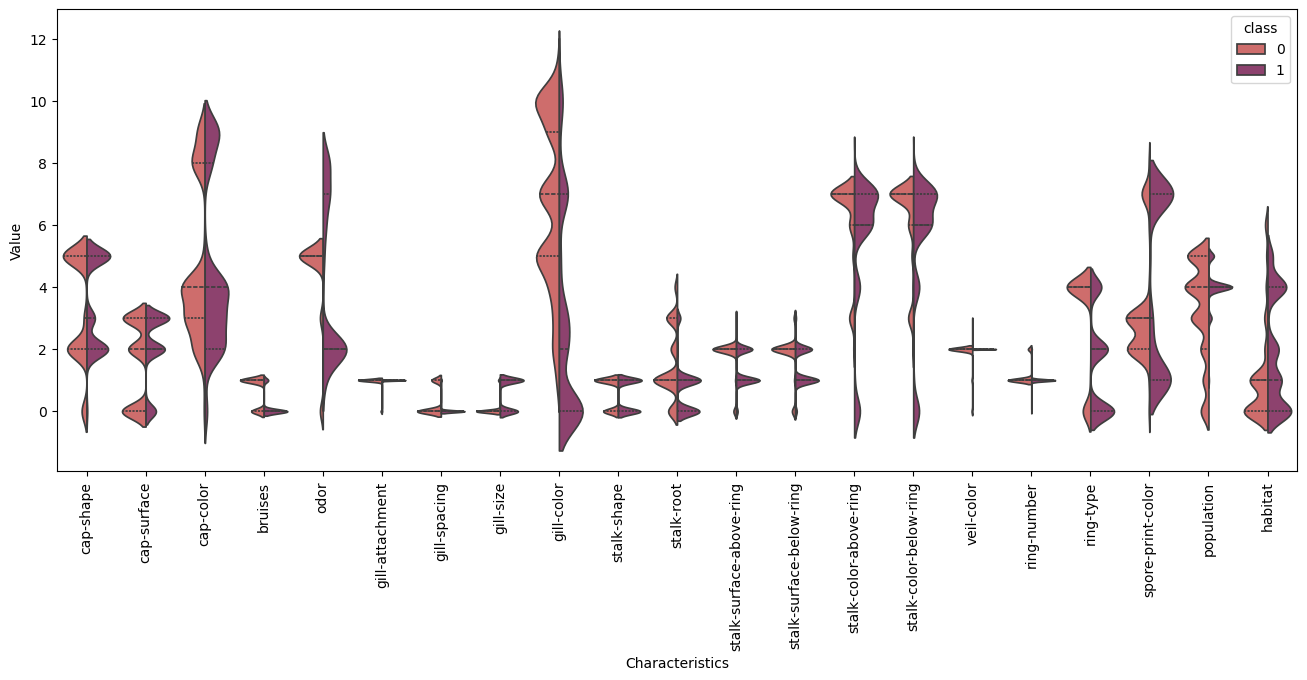

In [84]:
fig,ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax,x="Characteristics",y="Value",hue="class",split=True,data=df_div,inner="quartile",density_norm='width',palette="flare")
dataset_no_class = dataset.drop(["class"],axis=1)
p.set_xticks(list(dataset_no_class.columns))
p.set_xticklabels(rotation=90,labels = list(dataset_no_class.columns))
plt.show()

In [85]:
dataset.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [86]:
!pip install seaborn --upgrade


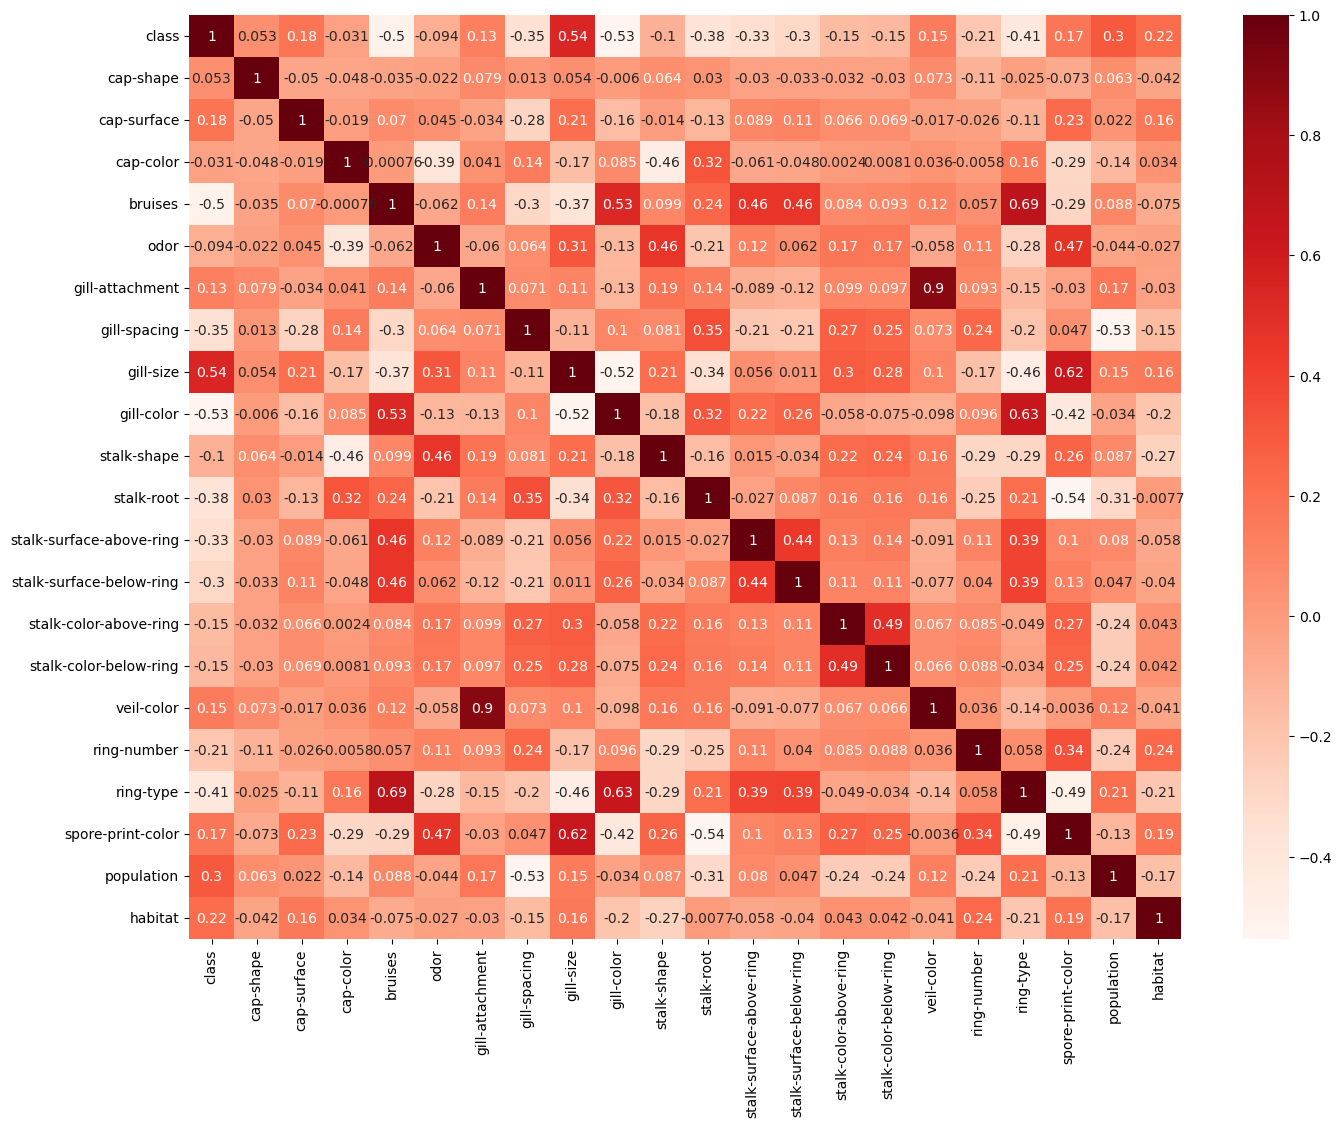

In [87]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset.corr(),cmap="Reds",annot=True)
plt.show()

In [88]:
dataset[['class','gill-color']].groupby(["gill-color"],as_index=False).mean().sort_values(by="class",ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


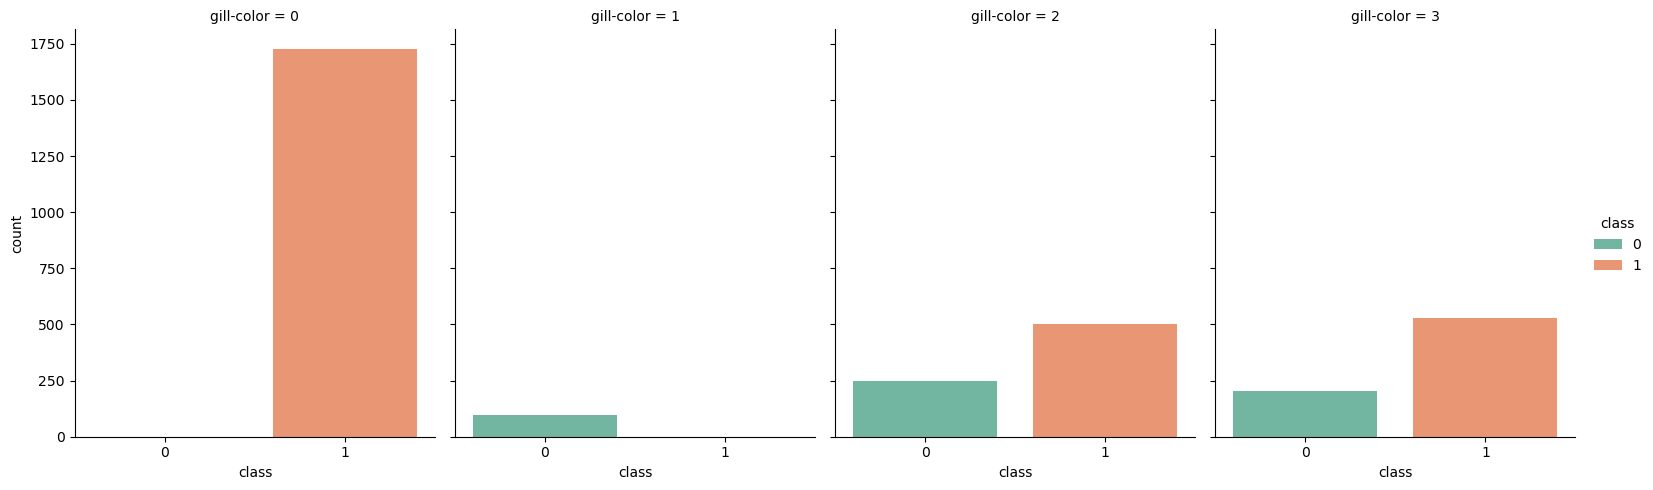

In [89]:
#Let's look at the factor plot of the gill color and then look closely at it.

new_dt = dataset[["class","gill-color"]]
new_dt = new_dt[new_dt["gill-color"] < 3.5]
sns.catplot(data=new_dt,x='class',hue="class",col="gill-color",kind="count",aspect=.8,col_wrap=4,palette="Set2")



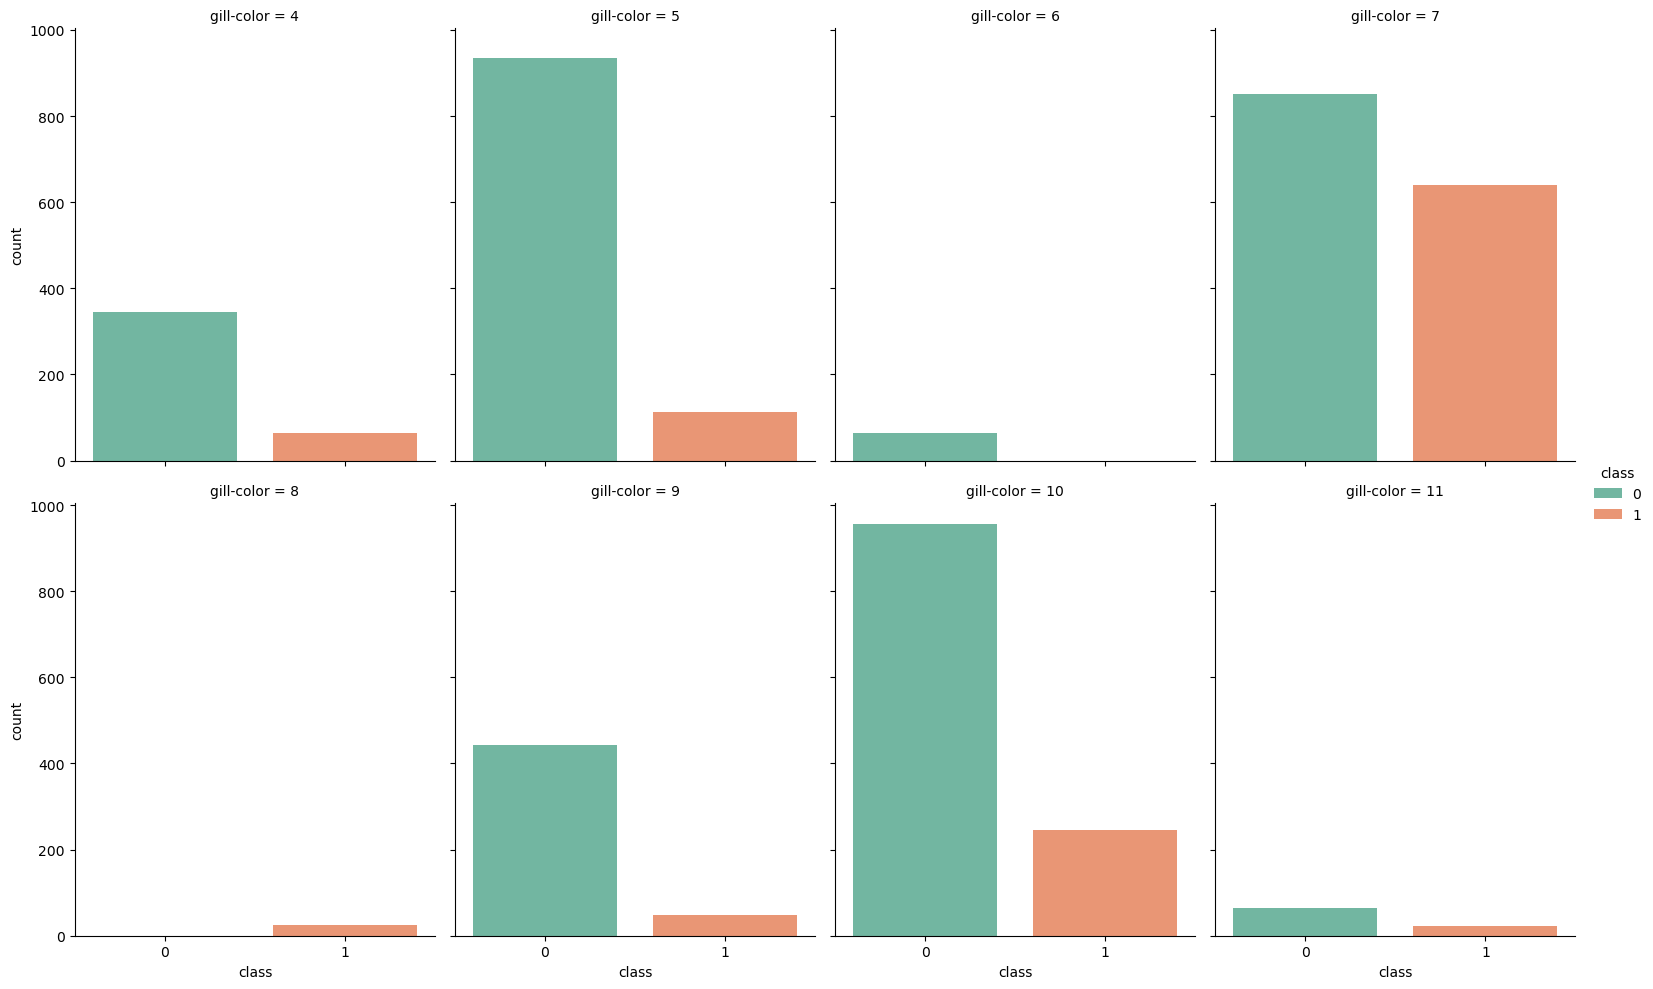

In [96]:
new_dt = dataset[["class","gill-color"]]
new_dt = new_dt[new_dt["gill-color"] > 3.5]
sns.catplot(data=new_dt,x='class',hue="class",col="gill-color",kind="count",aspect=.8,col_wrap=4,palette="Set2")


In [141]:
X = dataset.drop(["class"],axis=1)
y = dataset["class"]
# 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=.1)

In [159]:
#Let's use Decision Tree Classisfication
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
feature_list = X.columns.values
feature_importance = dt_classifier.feature_importances_
#this gives the sorted index array
sorted_index = np.argsort(feature_importance)
i=0
for column in feature_list:
    print(column,"----",feature_importance[i])
    i = i + 1
#from this observation we can conclude that the gill-color has the highest importance for prediciting the mushroom is edible or poisonous.

cap-shape ---- 0.0
cap-surface ---- 0.0
cap-color ---- 0.0029593168187538508
bruises ---- 0.028313986065382716
odor ---- 0.0
gill-attachment ---- 0.0
gill-spacing ---- 0.0
gill-size ---- 0.12459384367255448
gill-color ---- 0.3462385965236655
stalk-shape ---- 0.0237621581283308
stalk-root ---- 0.04957601021017544
stalk-surface-above-ring ---- 0.0
stalk-surface-below-ring ---- 0.002287024228825887
stalk-color-above-ring ---- 0.0
stalk-color-below-ring ---- 0.018873130145260198
veil-color ---- 0.0
ring-number ---- 0.0014417190693889286
ring-type ---- 0.0
spore-print-color ---- 0.20601563583279076
population ---- 0.17133520131971827
habitat ---- 0.024603377985153097


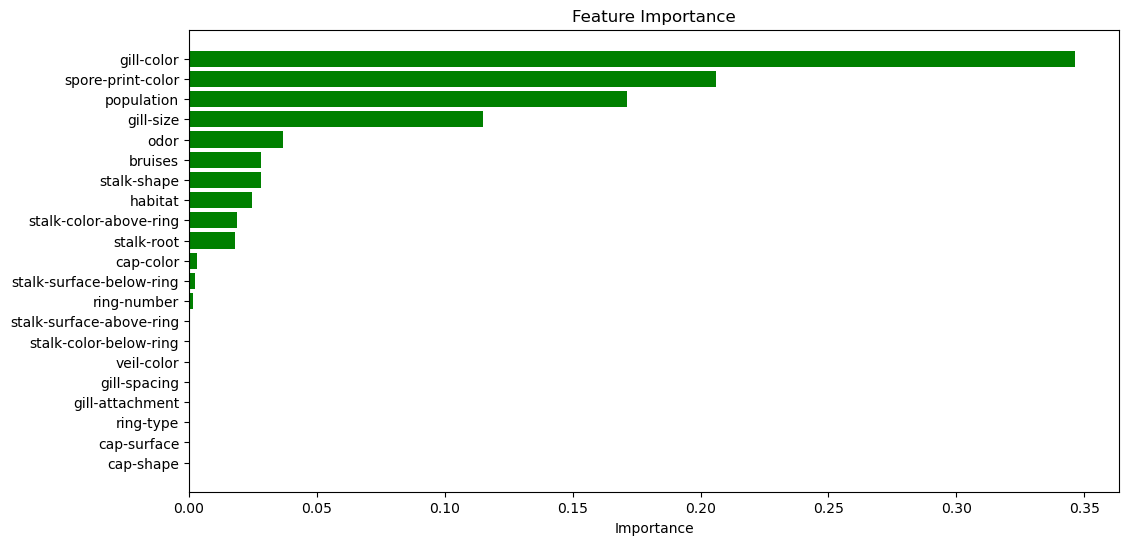

In [139]:
plt.figure(figsize=(12,6))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.barh(range(len(sorted_index)),feature_importance[sorted_index],align="center",color="green")
plt.yticks(range(len(sorted_index)),feature_list[sorted_index])
plt.show()

In [148]:
y_dt_predict = dt_classifier.predict(X_test)

In [158]:
print(f"Decision tree classifier report for mushroom classification \n \n {classification_report(y_test,y_dt_predict)}")
print(f"Test Accuracy for Decision tree classifier :{round(dt_classifier.score(X_test,y_test)*100,2)}%")

Decision tree classifier report for mushroom classification 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       364

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy for Decision tree classifier :100.0%


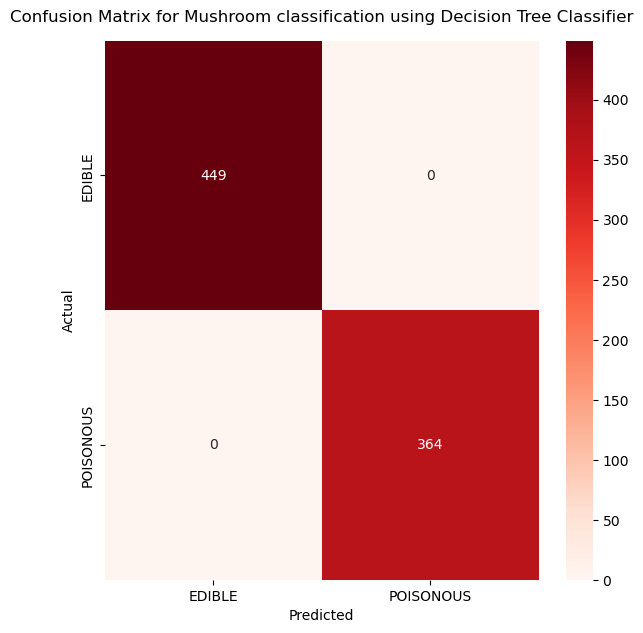

In [193]:
# Creating the confusion matrix for decision tree classifier

cf_mtrx = confusion_matrix(y_test,y_dt_predict)

x_axis_labels = ["EDIBLE","POISONOUS"]
y_axis_labels = ["EDIBLE","POISONOUS"]


fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cf_mtrx,annot=True,fmt = ".0f",cmap="Reds",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Mushroom classification using Decision Tree Classifier",y=1.02)
plt.show()

In [199]:
#LET'S USE LOGISTIC REGRESSION CLASSIFICATION
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs",max_iter=500)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [200]:
y_lr_predict = lr.predict(X_test)

In [202]:
print(f"Test Accuracy for Logistic Regression Classifier tree classifier :{round(lr.score(X_test,y_test)*100,2)}%")
print(f"Logistic Regression classifier report for mushroom classification \n \n {classification_report(y_test,y_lr_predict)}")

Test Accuracy for Logistic Regression Classifier tree classifier :96.31%
Logistic Regression classifier report for mushroom classification 
 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       449
           1       0.97      0.94      0.96       364

    accuracy                           0.96       813
   macro avg       0.96      0.96      0.96       813
weighted avg       0.96      0.96      0.96       813



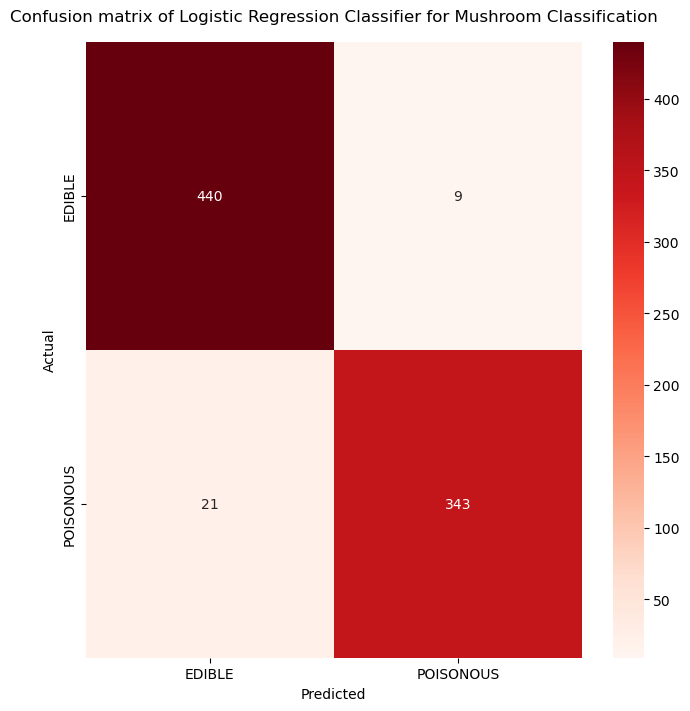

In [213]:
cf_mtrx = confusion_matrix(y_test,y_lr_predict)

fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Reds",fmt=".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of Logistic Regression Classifier for Mushroom Classification",y=1.02)
plt.show()

In [223]:
#Let's use KNN  Classifier
from sklearn.neighbors import KNeighborsClassifier

best_KValue = 0
best_score = 0

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    if knn.score(X_test,y_test) > best_score:
        best_score = knn.score(X_test,y_test)
        best_KValue = i
y_knn_predict = knn.predict(X_test)

In [230]:
print(f"Best KNN value:{best_KValue}")
print(f"Test Accuracy for KNN classifier {round(best_score*100,2)}% \n")
print(f"KNN classifier report for mushroom classification \n \n {classification_report(y_test,y_knn_predict)}")

Best KNN value:1
Test Accuracy for KNN classifier 100.0% 

KNN classifier report for mushroom classification 
 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       449
           1       0.99      1.00      0.99       364

    accuracy                           1.00       813
   macro avg       0.99      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



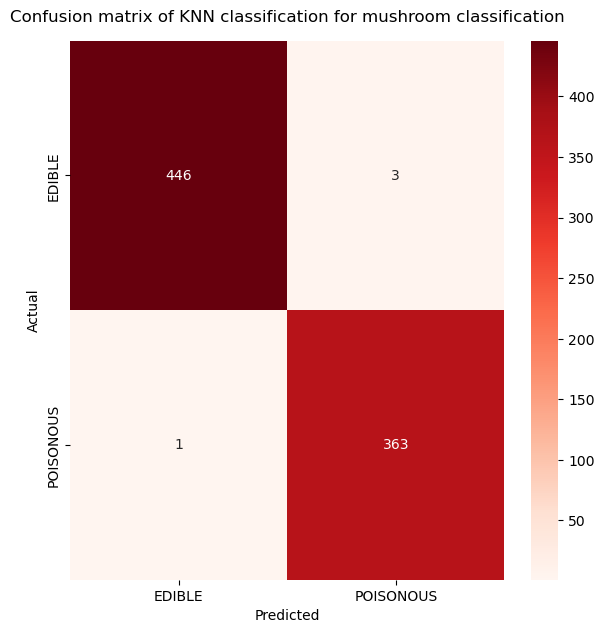

In [241]:
cf_matrix = confusion_matrix(y_test,y_knn_predict)
fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cf_matrix,annot=True,fmt=".0f",cmap="Reds",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of KNN classification for mushroom classification",y=1.02)
plt.show()

In [243]:
#LET'S TRY Naive Bayesion classifier too
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [245]:
y_nb_predict = nb_classifier.predict(X_test)

print(f"Test Accuracy for Naive Bayesian classifier {round(nb_classifier.score(X_test,y_test)*100,2)}% \n")
print(f"Naive Bayesian classifier report for mushroom classification \n \n {classification_report(y_test,y_nb_predict)}")

Test Accuracy for Naive Bayesian classifier 92.13% 

Naive Bayesian classifier report for mushroom classification 
 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       449
           1       0.91      0.91      0.91       364

    accuracy                           0.92       813
   macro avg       0.92      0.92      0.92       813
weighted avg       0.92      0.92      0.92       813



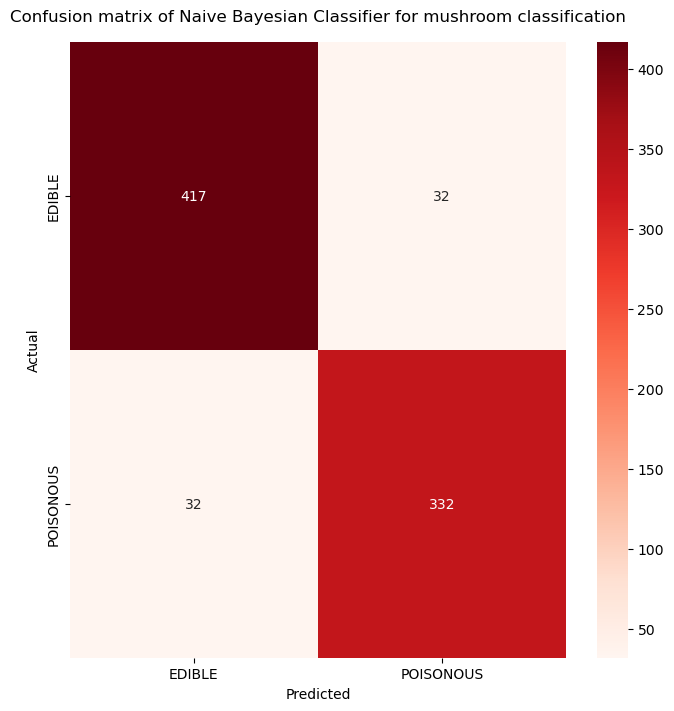

In [250]:
cf_matrix = confusion_matrix(y_test,y_nb_predict)

fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(cf_matrix,annot=True,fmt=".0f",cmap="Reds",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of Naive Bayesian Classifier for mushroom classification",y=1.02)
plt.show()

In [256]:
#LET'S TRY NEW, RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100,random_state=20)
rf_classifier.fit(X_train,y_train)
y_rf_predict = rf_classifier.predict(X_test)

In [258]:
print(f"Test Accuracy for Random Forest Classification {round(rf_classifier.score(X_test,y_test)*100,2)}% \n")
print(f"Random forest classifier report for mushroom classification \n \n {classification_report(y_test,y_rf_predict)}")

Test Accuracy for Random Forest Classification 100.0% 

Random forest classifier report for mushroom classification 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       364

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



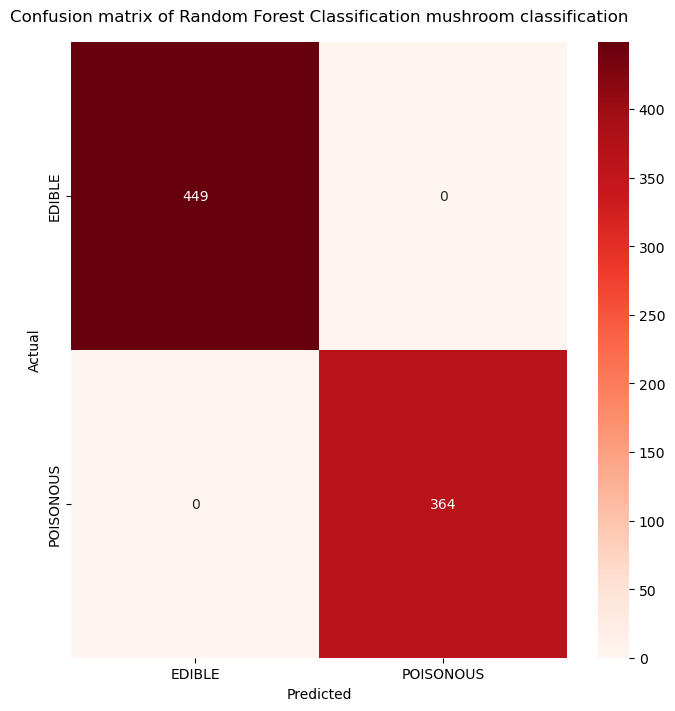

In [263]:
cf_matrix = confusion_matrix(y_test,y_rf_predict)
fig,ax =  plt.subplots(figsize=(8,8))
sns.heatmap(cf_matrix,annot=True,fmt=".0f",cmap="Reds",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of Random Forest Classification mushroom classification",y=1.02)
plt.show()

In [270]:
#LET'S USE SUPPOR VECTOR MACHINE CLASSIFIER TOO

from sklearn.svm import SVC

svm_classifier = SVC(random_state=20,gamma="auto")
svm_classifier.fit(X_train,y_train)
y_svm_predict = svm_classifier.predict(X_test)

In [272]:
print(f"Test Accuracy for Support Vector Classification {round(svm_classifier.score(X_test,y_test)*100,2)}% \n")
print(f" Support Vector Classifier report for mushroom classification \n \n {classification_report(y_test,y_svm_predict)}")

Test Accuracy for Support Vector Classification 100.0% 

 Support Vector Classifier report for mushroom classification 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       364

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



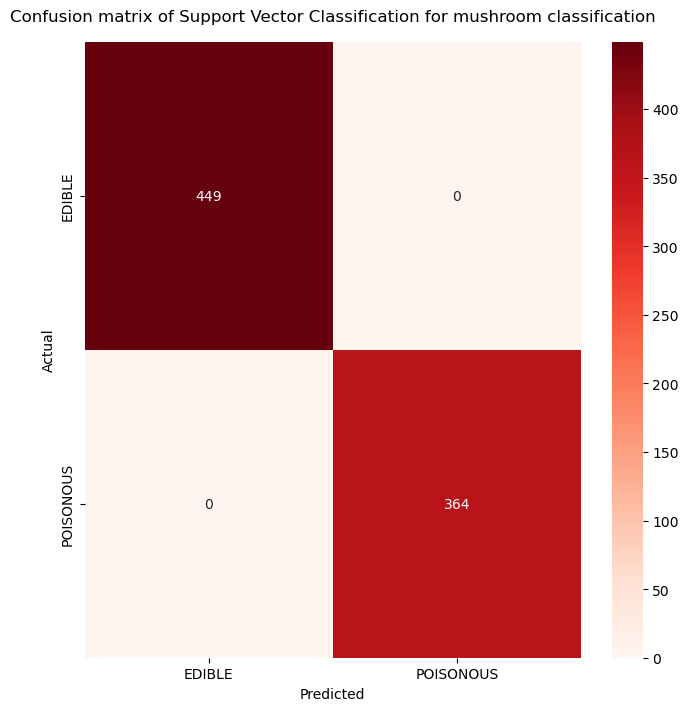

In [276]:
cf_matrix = confusion_matrix(y_test,y_svm_predict)

fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(cf_matrix,annot=True,fmt=".0f",cmap="Reds",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of Support Vector Classification for mushroom classification",y=1.02)
plt.show()

In [288]:
#LET'S MATCH THE PREDICTED VALUES WITH OUR ACTUAL TEST VALUES TO ENSURE IT'S 100% ACCURATE USING DECISION TREE AND SVM CLASSIFIER
preds_dt = dt_classifier.predict(X_test)

print("--------------------------------")
print("Using Decision Tree Classifier")
print("--------------------------------")

print(preds_dt[:30])
print(y_test[:30].values)
print("--------------------------------")
print("Using SVM")
print("--------------------------------")
preds_svm = svm_classifier.predict(X_test)
print(preds_svm[:20])
print(y_test[:20].values)

--------------------------------
Using Decision Tree Classifier
--------------------------------
[0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0]
[0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0]
--------------------------------
Using SVM
--------------------------------
[0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1]
[0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1]
